In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
data = pd.read_csv('Unemployment.csv')

In [16]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [18]:
data = data.dropna()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [20]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [21]:
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Replace spaces with underscores in the 'Region' column
data['Region'] = data['Region'].str.replace(' ', '_')


C:\Users\DELL\AppData\Local\Temp\ipykernel_26512\2354635056.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [22]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra_Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra_Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra_Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra_Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra_Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [23]:
print(data.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [24]:
print(data['Region'])

0      Andhra_Pradesh
1      Andhra_Pradesh
2      Andhra_Pradesh
3      Andhra_Pradesh
4      Andhra_Pradesh
            ...      
749       West_Bengal
750       West_Bengal
751       West_Bengal
752       West_Bengal
753       West_Bengal
Name: Region, Length: 740, dtype: object


In [25]:
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format='%d-%m-%Y')
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

**Trend of Unemployment Rate Over Time**

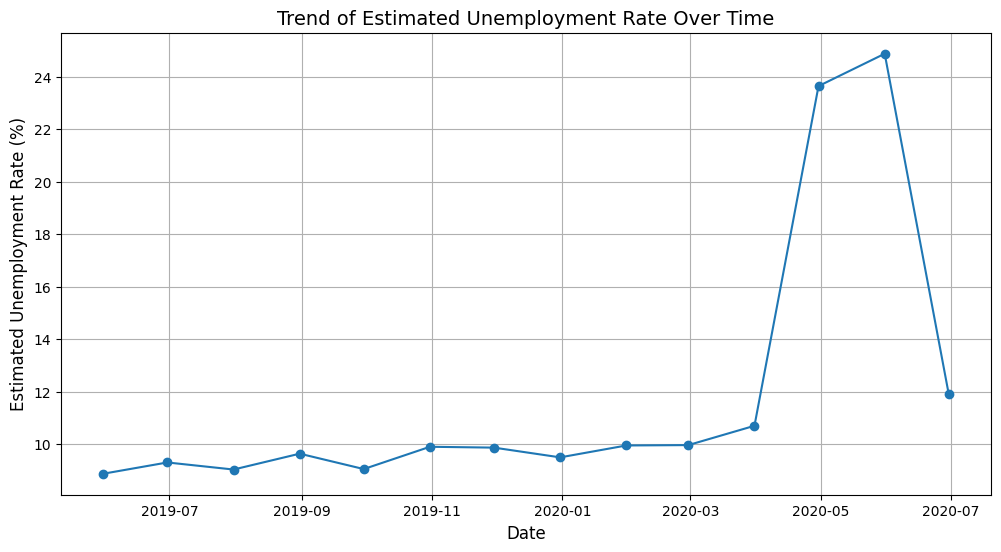

In [26]:
import matplotlib.pyplot as plt

# Group by Year and Month to aggregate the unemployment rates
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
unemployment_trend = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(unemployment_trend, marker='o')
plt.title('Trend of Estimated Unemployment Rate Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.show()


In [27]:
data = data.drop('Date', axis=1)

In [28]:
data = data.drop('Frequency', axis=1)

In [29]:
data

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra_Pradesh,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra_Pradesh,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra_Pradesh,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra_Pradesh,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra_Pradesh,5.17,12256762.0,44.68,Rural,30,9,2019
...,...,...,...,...,...,...,...,...
749,West_Bengal,7.55,10871168.0,44.09,Urban,29,2,2020
750,West_Bengal,6.67,10806105.0,43.34,Urban,31,3,2020
751,West_Bengal,15.63,9299466.0,41.20,Urban,30,4,2020
752,West_Bengal,15.22,9240903.0,40.67,Urban,31,5,2020


In [30]:
print(data.columns)

Index(['Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Area', 'Day', 'Month',
       'Year'],
      dtype='object')


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Estimated Unemployment Rate (%)          740 non-null    float64
 2   Estimated Employed                       740 non-null    float64
 3   Estimated Labour Participation Rate (%)  740 non-null    float64
 4   Area                                     740 non-null    object 
 5   Day                                      740 non-null    int32  
 6   Month                                    740 non-null    int32  
 7   Year                                     740 non-null    int32  
dtypes: float64(3), int32(3), object(2)
memory usage: 43.4+ KB


In [32]:
data = pd.get_dummies(data, columns=['Region','Area'], dtype=int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Estimated Unemployment Rate (%)          740 non-null    float64
 1   Estimated Employed                       740 non-null    float64
 2   Estimated Labour Participation Rate (%)  740 non-null    float64
 3   Day                                      740 non-null    int32  
 4   Month                                    740 non-null    int32  
 5   Year                                     740 non-null    int32  
 6   Region_Andhra_Pradesh                    740 non-null    int32  
 7   Region_Assam                             740 non-null    int32  
 8   Region_Bihar                             740 non-null    int32  
 9   Region_Chandigarh                        740 non-null    int32  
 10  Region_Chhattisgarh                      740 non-null  

In [34]:
print(data.columns)

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Day', 'Month', 'Year',
       'Region_Andhra_Pradesh', 'Region_Assam', 'Region_Bihar',
       'Region_Chandigarh', 'Region_Chhattisgarh', 'Region_Delhi',
       'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal_Pradesh', 'Region_Jammu_&_Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya_Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil_Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar_Pradesh', 'Region_Uttarakhand',
       'Region_West_Bengal', 'Area_Rural', 'Area_Urban'],
      dtype='object')


In [35]:
data

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Day,Month,Year,Region_Andhra_Pradesh,Region_Assam,Region_Bihar,Region_Chandigarh,...,Region_Rajasthan,Region_Sikkim,Region_Tamil_Nadu,Region_Telangana,Region_Tripura,Region_Uttar_Pradesh,Region_Uttarakhand,Region_West_Bengal,Area_Rural,Area_Urban
0,3.65,11999139.0,43.24,31,5,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.05,11755881.0,42.05,30,6,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.75,12086707.0,43.50,31,7,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.32,12285693.0,43.97,31,8,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.17,12256762.0,44.68,30,9,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,7.55,10871168.0,44.09,29,2,2020,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
750,6.67,10806105.0,43.34,31,3,2020,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
751,15.63,9299466.0,41.20,30,4,2020,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
752,15.22,9240903.0,40.67,31,5,2020,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


**Unemployment Rate Across Regions**

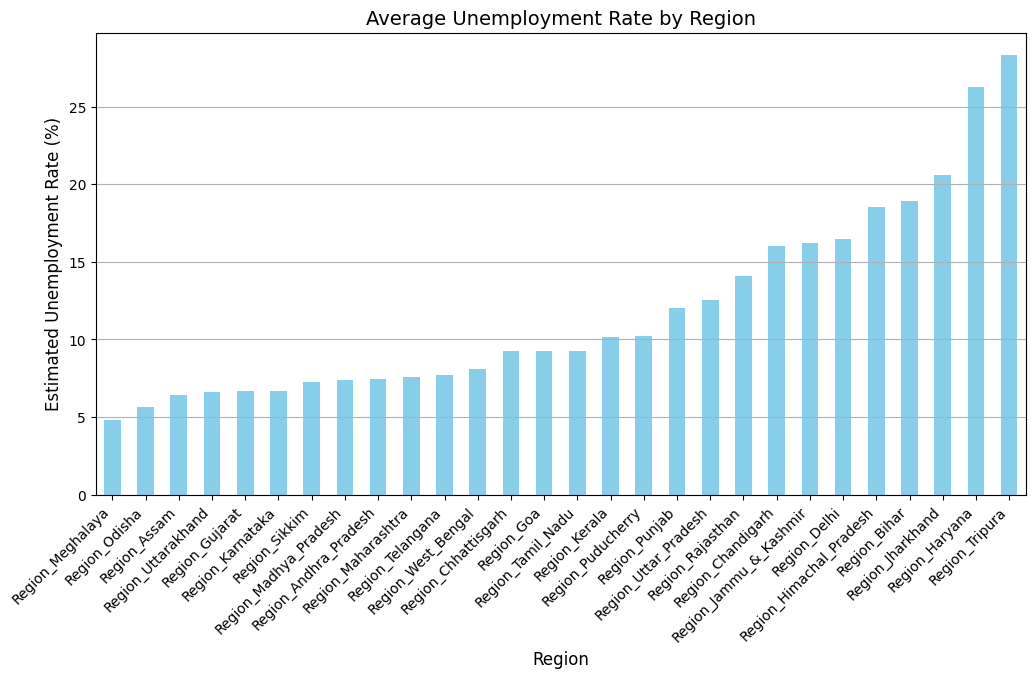

In [36]:
# Calculate average unemployment rate per region
regions = [col for col in data.columns if col.startswith('Region_')]
region_unemployment = data[regions].mul(data['Estimated Unemployment Rate (%)'], axis=0).sum() / data[regions].sum()

# Plot
region_unemployment.sort_values().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Unemployment Rate by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Unemployment Rate by Area (Rural vs Urban)**

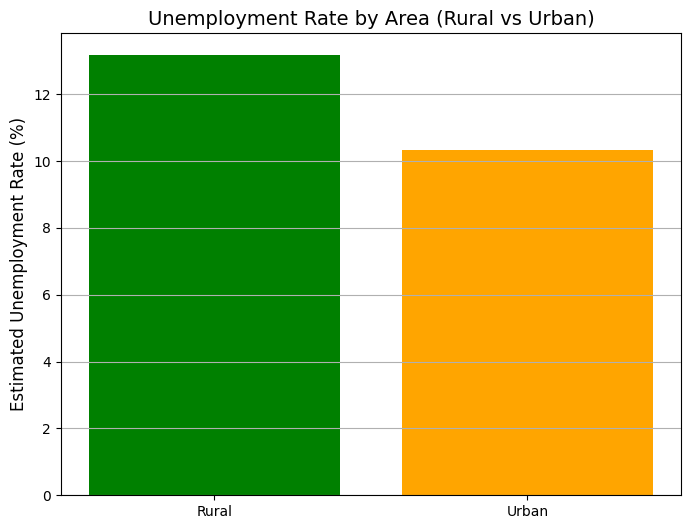

In [37]:
area_unemployment = data.groupby(['Area_Rural', 'Area_Urban'])['Estimated Unemployment Rate (%)'].mean()

# Prepare labels for rural and urban
labels = ['Rural', 'Urban']
values = area_unemployment.values

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'orange'])
plt.title('Unemployment Rate by Area (Rural vs Urban)', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.grid(axis='y')
plt.show()


**Correlation Heatmap**

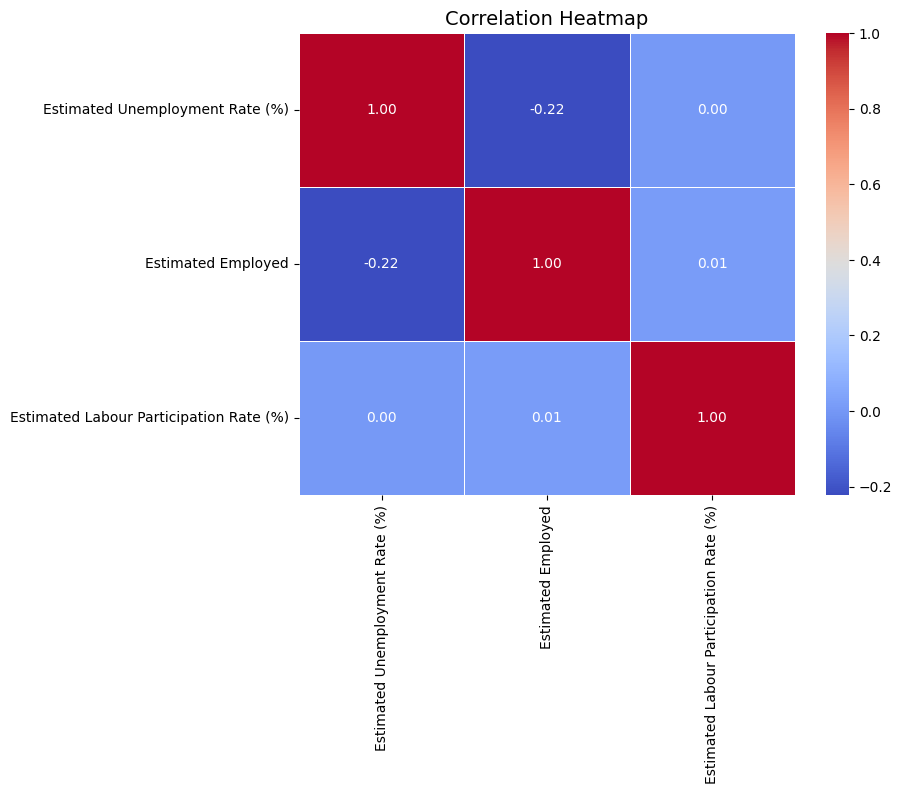

In [38]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = data.drop('Estimated Unemployment Rate (%)', axis=1)
y = data['Estimated Unemployment Rate (%)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR()
}

# Initialize variables for best model tracking
best_model = None
best_score = -np.inf
best_model_name = None

# Loop through models and evaluate performance
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)

    # Track the best model
    if mean_score > best_score:
        best_model = model
        best_score = mean_score
        best_model_name = model_name

print(f"Best Model: {best_model_name}")
print(f"Best Cross-Validation Score: {best_score}")


'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.svm import SVR\nfrom sklearn.model_selection import cross_val_score\nimport numpy as np\n\n# Define models\nmodels = {\n    \'RandomForest\': RandomForestRegressor(),\n    \'LinearRegression\': LinearRegression(),\n    \'SVR\': SVR()\n}\n\n# Initialize variables for best model tracking\nbest_model = None\nbest_score = -np.inf\nbest_model_name = None\n\n# Loop through models and evaluate performance\nfor model_name, model in models.items():\n    print(f"Evaluating {model_name}...")\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'r2\')\n    mean_score = np.mean(scores)\n\n    # Track the best model\n    if mean_score > best_score:\n        best_model = model\n        best_score = mean_score\n        best_model_name = model_name\n\nprint(f"Best Model: {best_model_name}")\nprint(f"Best Cross-Validation Score: {best_score}")'

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV for RandomForest with the defined hyperparameter grid
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

# Print the results
print(f"Best Parameters for RandomForest: {best_rf_params}")
print(f"Best Cross-Validation Score for RandomForest: {best_rf_score}")

'from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for RandomForest\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# Initialize GridSearchCV for RandomForest with the defined hyperparameter grid\ngrid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=\'r2\', verbose=1)\n\n# Fit GridSearchCV to find the best parameters\ngrid_search_rf.fit(X_train, y_train)\n\n# Get the best model and parameters\nbest_rf_model = grid_search_rf.best_estimator_\nbest_rf_params = grid_search_rf.best_params_\nbest_rf_score = grid_search_rf.best_score_\n\n# Print the results\nprint(f"Best Parameters for RandomForest: {best_rf_params}")\nprint(f"Best Cross-Validation Score for RandomForest: {best_rf_score}")'

In [ ]:
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model to your training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Test Set RMSE: {rmse:.4f}")
print(f"Test Set R²: {r2:.4f}")

Test Set RMSE: 7.0861
Test Set R²: 0.6532


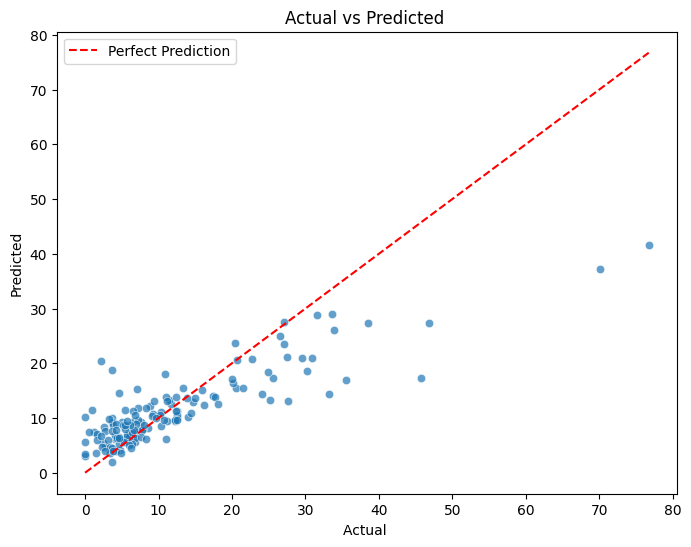

     Actual   Predicted 
120    25.64   17.325026
430     6.29    8.501085
334     5.74    6.527741
350     6.78    5.525238
426     7.22   11.808428
568     6.20    7.007585
76      5.38   11.512900
314    31.61   28.740143
247     8.59    8.254115
338     5.56    5.799051


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted ')
plt.xlabel('Actual ')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Combine actual and predicted results for a detailed view
import pandas as pd
results_df = pd.DataFrame({
    "Actual ": y_test,
    "Predicted ": y_pred
})
print(results_df.head(10))

In [45]:
import pickle

# Save the model to a pickle file
with open('unemployement.pkl', 'wb') as cars:
    pickle.dump(model, cars)